# Feature Maps: Bridging to Kernel Methods

## 1. Introduction to Feature Maps

A **feature map** $\phi$ transforms input data into a higher-dimensional space:

$$
\phi: \mathbb{R}^p \rightarrow \mathbb{R}^d \quad \text{where } d \gg p
$$

**Key Motivation**: Enable linear models to solve non-linear problems by:
- Explicit mapping for classification/clustering
- Basis expansion for regression

> For advanced feature creation techniques, see [Feature-Engine's MathFeatures](https://feature-engine.trainindata.com/en/latest/api_doc/creation/MathFeatures.html).


## 2. Classification: Two-Ring Problem

### 2.1 Original 2D Space (Linear Failure)

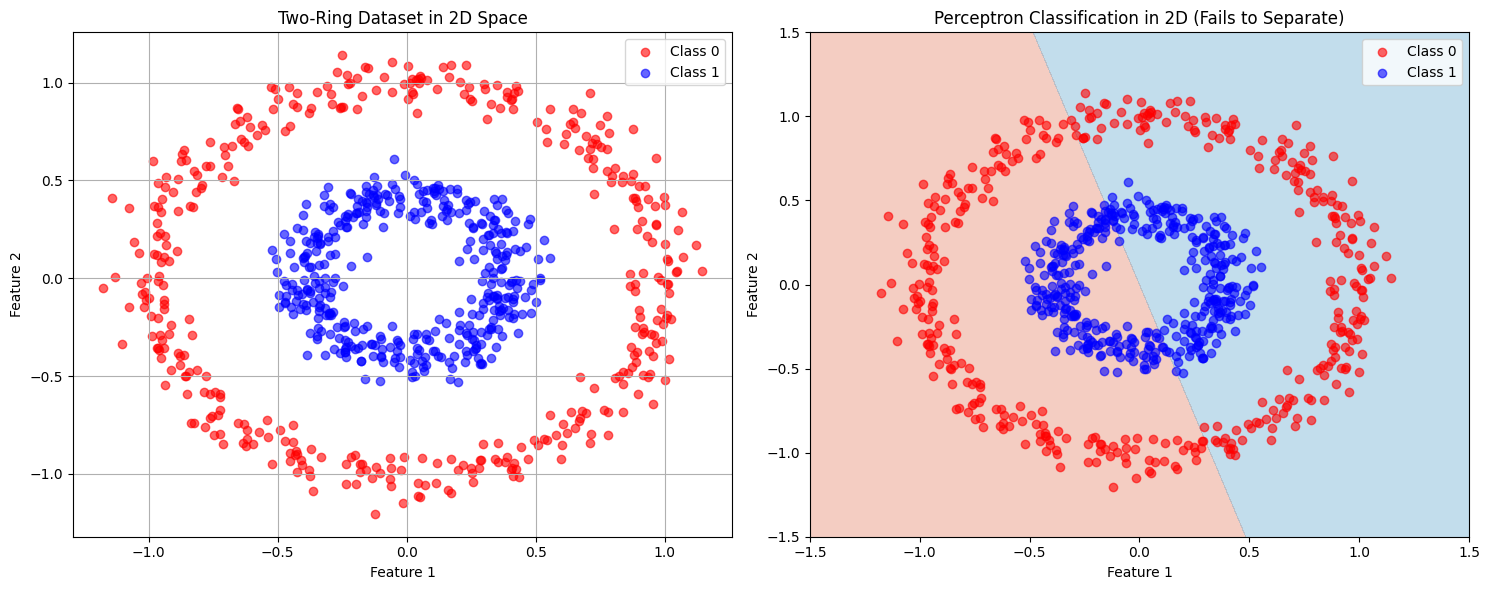

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.linear_model import Perceptron
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# 1. Generate Two-Ring Dataset
X, y = make_circles(n_samples=800, noise=0.07, factor=0.4, random_state=42)

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # Adjusted figsize for better side-by-side view
# 2. Visualize Original 2D Data (on the first subplot)
axes[0].scatter(X[y == 0, 0], X[y == 0, 1], color='red', alpha=0.6, label='Class 0')
axes[0].scatter(X[y == 1, 0], X[y == 1, 1], color='blue', alpha=0.6, label='Class 1')
axes[0].set_title("Two-Ring Dataset in 2D Space")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].legend()
axes[0].grid(True)
# 3. Apply Perceptron (Linear Classifier)
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X, y)

# Create decision boundary grid
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200), np.linspace(-1.5, 1.5, 200))
Z = perceptron.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot Perceptron Classification (on the second subplot)
axes[1].contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.4, cmap='RdBu')
axes[1].scatter(X[y == 0, 0], X[y == 0, 1], color='red', alpha=0.6, label='Class 0')
axes[1].scatter(X[y == 1, 0], X[y == 1, 1], color='blue', alpha=0.6, label='Class 1')
axes[1].set_title("Perceptron Classification in 2D (Fails to Separate)")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].legend()

# Adjust layout and display the combined plot
plt.tight_layout()
plt.show()

The map $\phi(x,y) = [x, y, x^2+y^2]$ makes classes linearly separable by converting radial distance to a linear feature.

In [2]:
# Transform to 3D (z = x² + y²)
X_3d = np.column_stack((X[:, 0], X[:, 1], X[:, 0]**2 + X[:, 1]**2))

# Perceptron in 3D
perceptron.fit(X_3d, y)

Perceptron(random_state=42)

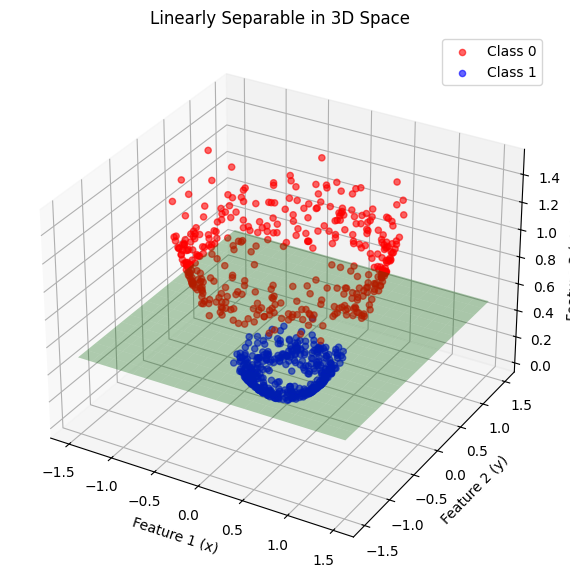

In [3]:
import matplotlib.pyplot as plt
# %matplotlib notebook
# Plot in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[y==0, 0], X_3d[y==0, 1], X_3d[y==0, 2], 
           color='red', label='Class 0', alpha=0.6, s=20)
ax.scatter(X_3d[y==1, 0], X_3d[y==1, 1], X_3d[y==1, 2], 
           color='blue', label='Class 1', alpha=0.6, s=20)

# Add optimal separating plane
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 20), np.linspace(-1.5, 1.5, 20))
zz = np.full(xx.shape, 0.5)  # Plane at z=0.5 (optimal boundary)
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

ax.set_title("Linearly Separable in 3D Space")
ax.set_xlabel("Feature 1 (x)")
ax.set_ylabel("Feature 2 (y)")
ax.set_zlabel("Feature 3 (x² + y²)")
ax.legend()
plt.show()

In [4]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter3d(
        x=X_3d[y==0, 0], y=X_3d[y==0, 1], z=X_3d[y==0, 2],
        mode='markers', marker=dict(size=3, color='red'), name='Class 0'
    ),
    go.Scatter3d(
        x=X_3d[y==1, 0], y=X_3d[y==1, 1], z=X_3d[y==1, 2],
        mode='markers', marker=dict(size=3, color='blue'), name='Class 1'
    ),
    go.Surface(
        x=xx, y=yy, z=zz, opacity=0.3, colorscale='Greens', showscale=False
    )
])

fig.update_layout(
    title="Linearly Separable in 3D Space (Interactive)",
    scene=dict(
        xaxis_title='Feature 1 (x)',
        yaxis_title='Feature 2 (y)',
        zaxis_title='Feature 3 (x² + y²)'
    )
)
fig.show()


## 3. Clustering: Two-Ring Problem

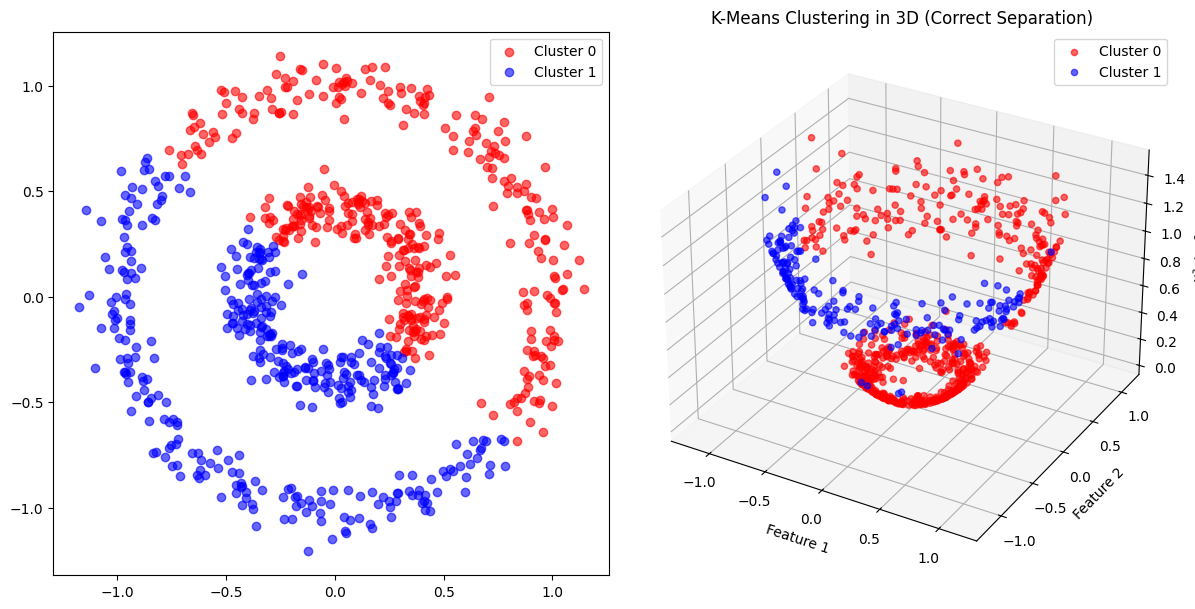

In [20]:

# Apply K-Means Clustering in 2D
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
# plt.figure(figsize=(10, 5))
ax1.scatter(X[cluster_labels == 0, 0], X[cluster_labels == 0, 1], color='red', alpha=0.6, label='Cluster 0')
ax1.scatter(X[cluster_labels == 1, 0], X[cluster_labels == 1, 1], color='blue', alpha=0.6, label='Cluster 1')
ax1.legend()

# Transform to 3D (z = x² + y²)
X_3d = np.column_stack((X[:, 0], X[:, 1], X[:, 0]**2 + X[:, 1]**2))
# 7. K-Means in 3D
# kmeans_3d = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_3d)
cluster_labels_3d = kmeans.labels_

# K-Means results in 3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_3d[cluster_labels_3d == 0, 0], 
            X_3d[cluster_labels_3d == 0, 1], 
            X_3d[cluster_labels_3d == 0, 2], color='red', alpha=0.6, label='Cluster 0')
ax2.scatter(X_3d[cluster_labels_3d == 1, 0], 
            X_3d[cluster_labels_3d == 1, 1], 
            X_3d[cluster_labels_3d == 1, 2], color='blue', alpha=0.6, label='Cluster 1')
ax2.set_title("K-Means Clustering in 3D (Correct Separation)")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.set_zlabel("x² + y²")
ax2.legend()

plt.tight_layout()
plt.show()



## Regression Example: Using Feature Maps for Non-Linear Data

**Goal:** To demonstrate how mapping features to a higher-dimensional space can allow a linear model to fit non-linear data.

**Motivation:** Standard linear regression models assume a linear relationship between the features (independent variables) and the target (dependent variable). What happens when the underlying relationship is non-linear? A simple linear model will perform poorly.

Consider a scenario where the data follows a curve, for example, a quadratic relationship. A straight line (from linear regression) won't capture this curve effectively.

**Solution Idea:** We can transform the original features into a higher-dimensional space where the relationship *becomes* linear. This transformation is called a **feature map**, denoted by Φ.

Let's illustrate this with an example.

### 1. Generating Non-Linear Data

We'll create synthetic data where `y` depends quadratically on `x`, plus some random noise to make it more realistic.

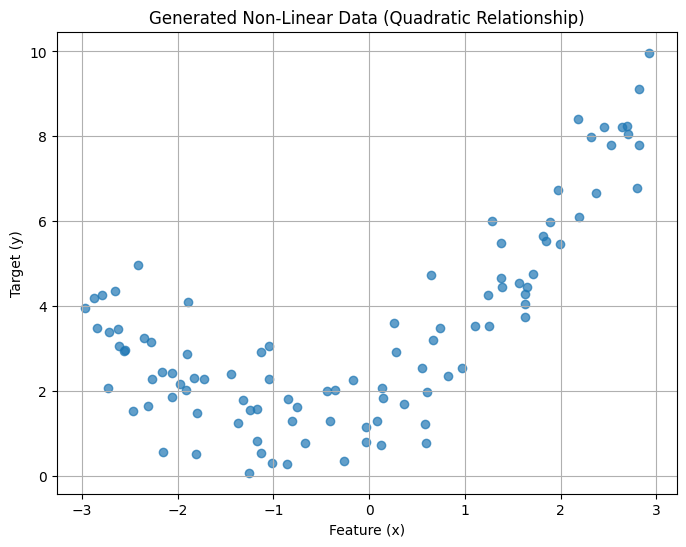

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)

# Generate data points
m = 100 # number of samples
X = 6 * np.random.rand(m, 1) - 3 # Feature values between -3 and 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # Quadratic relationship + noise

# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7)
plt.title("Generated Non-Linear Data (Quadratic Relationship)")
plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.grid(True)
plt.show()


As you can see, the data clearly follows a curve, not a straight line.

### 2. Attempting Simple Linear Regression (Original Space)

Let's see how a standard linear regression model performs on this data without any feature transformation.


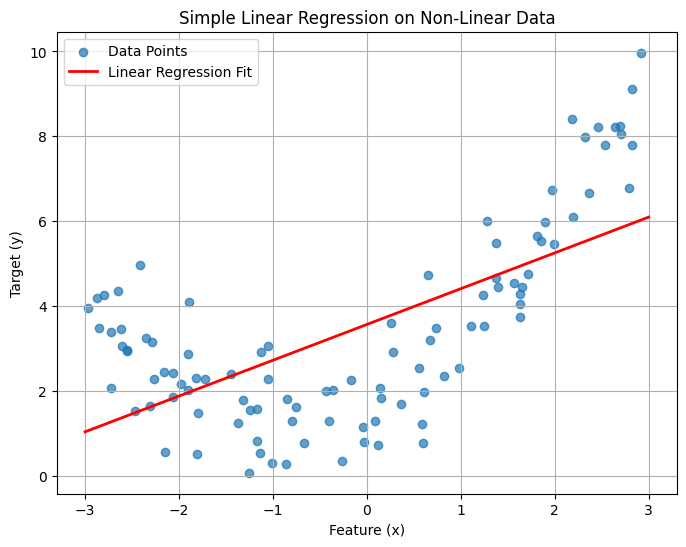

Linear Regression Score (R^2): 0.4260


In [22]:
# Train a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Make predictions
X_new = np.linspace(-3, 3, 100).reshape(100, 1) # Points for plotting the line
y_pred_linear = lin_reg.predict(X_new)

# Visualize the fit
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label="Data Points")
plt.plot(X_new, y_pred_linear, "r-", linewidth=2, label="Linear Regression Fit")
plt.title("Simple Linear Regression on Non-Linear Data")
plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Linear Regression Score (R^2): {lin_reg.score(X, y):.4f}")

The linear model tries its best to fit a straight line through the curved data, but it's clearly a poor fit. The R² score will likely be low, indicating that the model doesn't explain much of the variance in the data.

### 3. Applying a Feature Map (Polynomial Features)

Now, let's apply a feature map. Since we know the underlying relationship is quadratic (`y ≈ ax² + bx + c`), a suitable feature map Φ would transform our single feature `x` into two features: `x` and `x²`.
So, Φ(x) = `[x, x²]`.

We can achieve this using Scikit-Learn's `PolynomialFeatures`.


In [23]:
# Create polynomial features (degree=2 includes x and x^2)
# include_bias=False because LinearRegression handles the intercept (bias) term
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Display the original feature and the transformed features for the first few samples
print("Original X (first 5 samples):\n", X[:5])
print("\nTransformed X_poly (first 5 samples) [x, x^2]:\n", X_poly[:5])

Original X (first 5 samples):
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Transformed X_poly (first 5 samples) [x, x^2]:
 [[-0.75275929  0.56664654]
 [ 2.70428584  7.3131619 ]
 [ 1.39196365  1.93756281]
 [ 0.59195091  0.35040587]
 [-2.06388816  4.25963433]]


Notice that our data is now represented in a 2-dimensional feature space `[x, x²]`.

### 4. Linear Regression in the Higher-Dimensional Feature Space

Now, we train a *linear* regression model, but using the *transformed* features (`X_poly`). The model will learn weights for both `x` and `x²`, effectively fitting a model of the form:
`y = w₁*x + w₂*x² + b`
where `w₁`, `w₂` are the weights (coefficients) and `b` is the intercept (bias). This is a linear model with respect to the *new features* `x` and `x²`.

Original linear model:

$$
\hat{y} = \mathbf{w}^T\mathbf{x} = \sum_{i=1}^{p} w_i x_i 
$$

A transformation $\phi$ that maps features to higher dimensions:

$$
\phi: \mathbb{R}^p \rightarrow \mathbb{R}^d \quad (d \gg p)
$$
New model becomes:

$$
\hat{y} = \mathbf{w}^T\phi(\mathbf{x})
$$

For p=1, degree=2:

$$
[1, x_1] \xrightarrow{\phi} [1, x_1, x_1^2]
$$

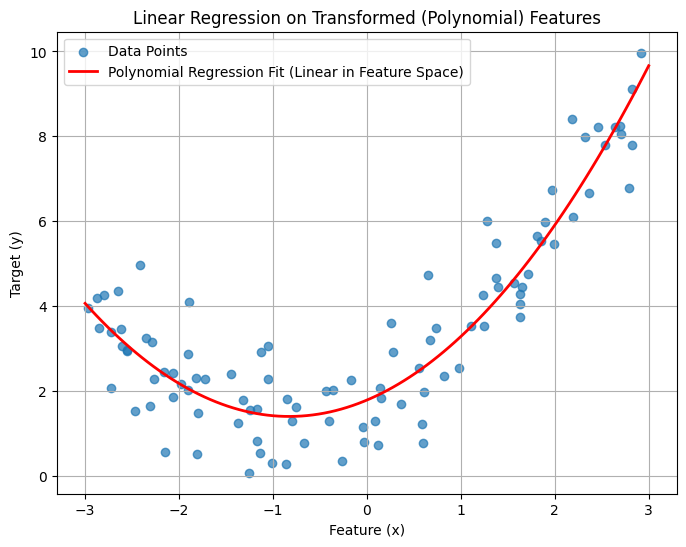

Polynomial Regression Score (R^2): 0.8525
Coefficients (w1, w2): [[0.93366893 0.56456263]]
Intercept (b): [1.78134581]


In [24]:
# Train a linear regression model on the polynomial features
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, y)

# Make predictions using the polynomial model
X_new_poly = poly_features.transform(X_new) # Transform the plotting points
y_pred_poly = poly_lin_reg.predict(X_new_poly)

# Visualize the fit
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7, label="Data Points")
plt.plot(X_new, y_pred_poly, "r-", linewidth=2, label="Polynomial Regression Fit (Linear in Feature Space)")
plt.title("Linear Regression on Transformed (Polynomial) Features")
plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Polynomial Regression Score (R^2): {poly_lin_reg.score(X_poly, y):.4f}")
# Display the learned coefficients (w1 for x, w2 for x^2) and intercept (b)
print(f"Coefficients (w1, w2): {poly_lin_reg.coef_}")
print(f"Intercept (b): {poly_lin_reg.intercept_}")


### 5. Conclusion

By mapping the original single feature `x` to a higher-dimensional space `[x, x²]`, we enabled a standard linear regression model to perfectly capture the non-linear (quadratic) relationship present in the data. The resulting fit is much better, as indicated visually and by the significantly higher R² score.

This example illustrates the power of feature maps: transforming data into a space where linear models can become effective, even if the original relationship was non-linear.

**Transition to Kernel Trick:** While this explicit feature mapping works well for low-dimensional data and simple transformations, calculating and storing these higher-dimensional features can become computationally expensive or even infeasible if the original data or the target feature space is very high-dimensional (e.g., using polynomial features of a very high degree or other complex maps). The **Kernel Trick** provides a mathematical shortcut to achieve the same result as working in the high-dimensional feature space *without* explicitly computing the coordinates of the data in that space. It allows algorithms that only depend on dot products between data points (like Support Vector Machines) to operate implicitly in the high-dimensional feature space, making complex mappings computationally tractable. This regression example helps build the intuition for *why* such implicit mappings are desirable.


For modern approaches, see [arXiv:2406.03505](https://arxiv.org/html/2406.03505v1).

---

## To Do

### Limitations of Explicit Maps:
1. **Cost**: $\phi(X)$ storage is $\mathcal{O}(nd)$
2. **Overfitting**: Risk when $d \gg n$

**Kernel Trick Solution**:
- Implicit computation via $k(x_i,x_j) = \langle \phi(x_i), \phi(x_j) \rangle$
- Example: RBF kernel $k(x,y) = \exp(-\gamma \|x-y\|^2)$ corresponds to infinite-dimensional $\phi$



For Ridge regression:
$$
\mathbf{w}^* = (\Phi(X)^T\Phi(X) + \alpha I)^{-1} \Phi(X)^T \mathbf{y}
$$
- Original features (p=1): O(1) computation
- After polynomial expansion (d=10): O(100) computation

## 5. Key Takeaways

| Approach          | Pros                      | Cons                      |
|-------------------|---------------------------|---------------------------|
| Original Features | Simple, fast              | Limited expressiveness    |
| Feature Maps      | Enables non-linearity     | Computational cost        |
|                  | Works with linear models  | Risk of overfitting       |

**Next Step**: Kernel methods avoid explicit feature map computation!
